In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
customers_orders = customers.merge(orders, on = "customer_id", how = "left")

In [ ]:
orders_products = customers_orders.merge(products, on = "product_id", how = "left")

In [ ]:
orders_products ["total"] = orders_products["price"] * orders_products["quantity"]


In [ ]:
# Task 1 – Top 10 customers by total spending
top_customers = orders_products.groupby ("name") ["total"].sum().sort_values(ascending = False).head(10)
print("This is the top 10 customers by total spending:")
print(top_customers)

This is the top 10 customers by total spending:
name
Allison Hill        11742.29
Justin Baker        10750.78
Debra Davidson       9836.69
Michele Williams     7958.02
Ryan Munoz           7757.35
Daniel Wagner        7361.92
Lisa Jackson         6269.34
Matthew Foster       6098.56
Brian Ramirez        6058.74
Holly Wood           5432.16
Name: total, dtype: float64


In [ ]:
# Task 2 – Top selling product
product_quantity = orders_products.groupby("product_name")["quantity"].sum()
top_product_name = product_quantity.sort_values(ascending=False).index[0]
top_product_quantity = product_quantity.sort_values(ascending=False).iloc[0]
top_product_revenue = orders_products[orders_products["product_name"] == top_product_name]["total"].sum()
print(f"Top product is: {top_product_name}")
print(f"Quantity sold: {top_product_quantity}")
print(f"Total revenue: {top_product_revenue:.2f} €")

Top product is: Material Pro
Quantity sold: 26.0
Total revenue: 9237.02 €


In [ ]:
product_quantity = orders_products.groupby("product_name")["quantity"].sum()

# Find top product
top_product_name = product_quantity.idxmax()
top_product_quantity = product_quantity.max()

# Total revenue of top product
top_product_revenue = orders_products[orders_products["product_name"] == top_product_name]["total"].sum()

print(f"Top product is: {top_product_name}")
print(f"Quantity sold: {top_product_quantity}")
print(f"Total revenue: {top_product_revenue:.2f} €")

Top product is: Material Pro
Quantity sold: 26.0
Total revenue: 9237.02 €


<Axes: title={'center': 'Sales by country'}, xlabel='country'>

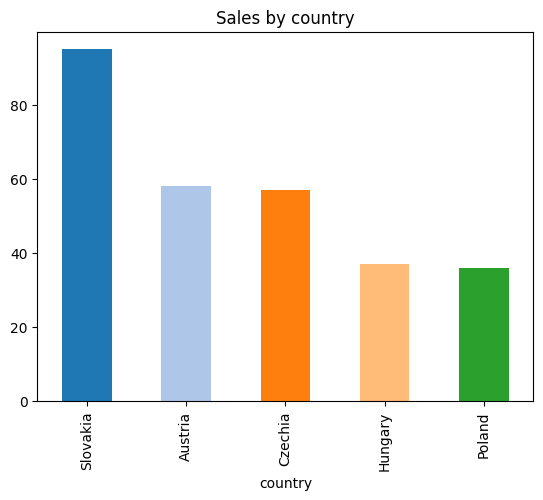

In [ ]:
# Task 3 – Sales by country (bar chart)
sales_by_country = orders_products.groupby("country") ["quantity"].sum().sort_values(ascending = False)
colors = plt.cm.tab20(range(len(sales_by_country)))
sales_by_country.plot(kind = "bar", title = "Sales by country", color=colors)


<Axes: title={'center': 'Monthly Revenue'}, xlabel='month'>

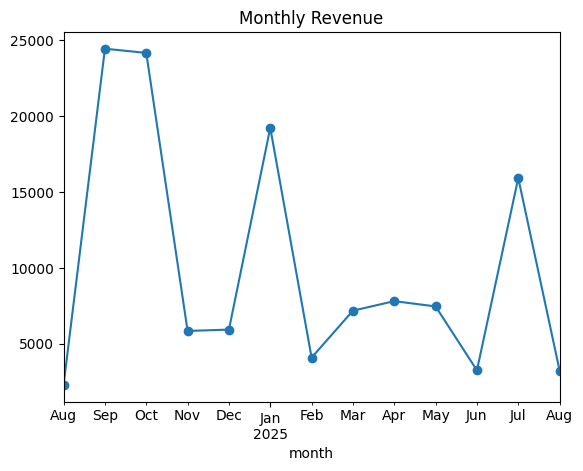

In [ ]:
# Task 4 – Sales trend over time (monthly)

orders_products['order_date'] = pd.to_datetime(orders_products['order_date'])
orders_products['month'] = orders_products['order_date'].dt.to_period('M')
sales_over_time = orders_products.groupby('month')["total"].sum()
sales_over_time.plot(kind="line", marker='o', title="Monthly Revenue")

In [ ]:
# Task 5 – Average price of customers' favorite products
fav_products = customers.merge(products, left_on="favorite_product_id", right_on="product_id", how="left")
avg_price_fav = fav_products["price"].mean()
print(f"Average price of favorite products: {avg_price_fav:.2f} €")

Average price of favorite products: 466.95 €


In [ ]:
# Task 6 – Top 5 countries with the highest average order value
top_countries = orders_products.groupby("country") ["total"].mean().sort_values(ascending = False).head(5)
print("Top 5 countries are:")
print(top_countries)


Top 5 countries are:
country
Poland      3561.235000
Slovakia    2818.459375
Austria     2547.122727
Czechia     2489.114444
Hungary     1729.418750
Name: total, dtype: float64


In [ ]:
# Task 7 – Most loyal customers (by number of orders)
top_customers = orders_products.groupby("name") ["quantity"].sum().sort_values(ascending = False).head(3)
print("Top 3 customers are:")
print(top_customers)

Top 3 customers are:
name
Allison Hill     21.0
Justin Baker     18.0
Daniel Wagner    17.0
Name: quantity, dtype: float64


In [ ]:
# Task 8 – Correlation between price and quantity sold
correlation = orders_products["price"].corr(orders_products["quantity"])
print("Correlation between price and quantity:", correlation)

Correlation between price and quantity: -0.1570623651089655
